# __Setup__

In [1]:
# SERVER = 'kaggle'
SERVER = "local"

MODE = "interactive"  # uses only 0.01 % of the whole dataset
# MODE = "full"  # uses the whole dataset

LOAD_PARQUET = 1  # 0: disables, 1: enables loading of parquet files

# random seed for the notebook
RSEED = 42

SAVE_SUBSAMPLE = 0  # 0: disables, 1: enables saving of a subsample train.csv file

# __0. Kaggle Competition__: Google - Isolated Sign Language Recognition

https://www.kaggle.com/competitions/asl-signs

## __Overview__

### __Description__

#### __Goal of the Competition__

The goal of this competition is to classify isolated American Sign Language (ASL) signs. You will create a [TensorFlow Lite](https://www.tensorflow.org/lite) model trained on labeled landmark data extracted using the [MediaPipe Holistic Solution](https://google.github.io/mediapipe/solutions/holistic.html).

Your work may improve the ability of PopSign* to help relatives of deaf children learn basic signs and communicate better with their loved ones.^

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/jcyWo_1Q_jY/0.jpg)](https://www.youtube.com/watch?v=jcyWo_1Q_jY)

#### __Context__

##### __Every day, 33 babies are born with permanent hearing loss in the U.S.__

Around 90% of which are born to hearing parents many of which may not know American Sign Language. (kdhe.ks.gov, deafchildren.org) Without sign language, deaf babies are at risk of Language Deprivation Syndrome. This syndrome is characterized by a lack of access to naturally occurring language acquisition during their critical language-learning years. It can cause serious impacts on different aspects of their lives, such as relationships, education, and employment.

##### __Learning sign language is challenging.__

Learning American Sign Language is as difficult for English speakers as learning Japanese. (jstor.org) It takes time and resources, which many parents don't have. They want to learn sign language, but it's hard when they are working long hours just to make ends meet. And even if they find the time and money for classes, the classes are often far away.

##### __Games can help.__

PopSign is a smartphone game app that makes learning American Sign Language fun, interactive, and accessible. Players match videos of ASL signs with bubbles containing written English words to pop them.
PopSign is designed to help parents with deaf children learn ASL, but it's open to anyone who wants to learn sign language vocabulary. By adding a sign language recognizer from this competition, PopSign players will be able to sign the type of bubble they want to shoot, providing the player with the opportunity to practice the sign themselves instead of just watching videos of other people signing.

##### __You can help connect deaf children and their parents.__

By training a sign language recognizer for PopSign, you can help make the game more interactive and improve the learning and confidence of players who want to learn sign language to communicate with their loved ones.

##### __Why TensorFlow Lite__

To allow the ML model to run on device in an attempt to limit latency inside the game, PopSign doesn’t send user videos to the cloud. Therefore, all inference must be done on the phone itself. PopSign is building its recognition pipeline on top of TensorFlow Lite, which runs on both Android and iOS. In order for the competition models to integrate seamlessly with PopSign, we are asking our competitors to submit their entries in the form of TensorFlow Lite models.

##### __Special thanks to our partners__

We’d like to thank the Georgia Institute of Technology, the National Technical Institute for the Deaf at Rochester Institute of Technology, and Deaf Professional Arts Network for their work to create the dataset, the PopSign game, and overall competition preparation.

| This is a Code Competition. Refer to [Code Requirements](https://kaggle.com/competitions/asl-signs/overview/code-requirements) for details |
|--------------------------------------------------------------------------------------------------------------------------------------------|

**PopSign is an app developed by the Georgia Institute of Technology and the National Technical Institute for the Deaf at Rochester Institute of Technology. The app is available in beta on Android and iOS.*

^*We cannot guarantee the competition will benefit the competitors or the disabled community directly.*

### __Evaluation__

The evaluation metric for this contest is simple classification __accuracy__.

#### __Submission Process__

In this competition you will be submitting a TensorFlow Lite model file. The model must take one or more landmark frames as an input and return a float vector (the predicted probabilities of each sign class) as the output. Your model must be packaged into a `submission.zip` file and compatible with the [TensorFlow Lite Runtime v2.9.1](https://www.tensorflow.org/lite/guide/python#run_an_inference_using_tflite_runtime). You are welcome to train your model using the framework of your choice, as long as you convert the model checkpoint into the tflite format prior to submission.

Your model must also perform inference with less than 100 milliseconds of latency per video on average and use less than 40 MB of storage space. Expect to see approximately 40,000 videos in the test set. We allow an additional 10 minute buffer for loading the data and miscellaneous overhead.

Each video is loaded with the following function:

```python
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)
```

Inference is performed (roughly) as follows, ignoring details like how we manage multiple videos:

```python
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path)

found_signatures = list(interpreter.get_signature_list().keys())

if REQUIRED_SIGNATURE not in found_signatures:
    raise KernelEvalException('Required input signature not found.')

prediction_fn = interpreter.get_signature_runner("serving_default")
output = prediction_fn(inputs=frames)
sign = np.argmax(output["outputs"])
```

### __Timeline__

- __February 23, 2023__ - Start Date.

- __April 25, 2023__ - Entry Deadline. You must accept the competition rules before this date in order to compete.

- __April 25, 2023__ - Team Merger Deadline. This is the last day participants may join or merge teams.

- __May 2, 2023__ - Final Submission Deadline.

All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. The competition organizers reserve the right to update the contest timeline if they deem it necessary.

### __Prizes__

* 1st Place - $50,000
* 2nd Place - $20,000
* 3rd Place - $10,000
* 4th Place - $10,000
* 5th Place - $10,000

### __Code Requirements__

#### __This is a Code Competition__

Submissions to this competition must be made through Notebooks. In order for the "Submit" button to be active after a commit, the following conditions must be met:

* CPU Notebook <= 9 hours run-time
* GPU Notebook <= 9 hours run-time
* Internet access disabled
* Freely & publicly available external data is allowed, including pre-trained models
* Submission file must be named submission.zip.

Please see the Code [Competition FAQ](https://www.kaggle.com/docs/competitions#notebooks-only-FAQ) for more information on how to submit. And review the [code debugging doc](https://www.kaggle.com/code-competition-debugging) if you are encountering submission errors.

### __Acknowledgements__

The dataset provided by Deaf Professional Arts Network and the Georgia Institute of Technology is licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). Kaggle and Google do not own and have not validated the dataset in any way.

### __Data Card__

#### __Dataset Card for the Isolated Sign Language Recognition Corpus__

##### __Dataset Summary__

The Isolated Sign Language Recognition corpus (version 1.0) is a collection of hand and facial landmarks generated by Mediapipe version 0.9.0.1 on ~100k videos of isolated signs performed by 21 Deaf signers from a 250-sign vocabulary.

##### __Supported Tasks and Leaderboards__

https://www.kaggle.com/competitions/asl-signs/leaderboard

##### __Languages__

American Sign Language

#### __Dataset Structure__

##### __Data Instances__

{'frame': 27, 'row_id': '27-face-0', 'type': 'face', 'landmark_index': 0, 'x': 0.4764270484447479, 'y': 0.3772650957107544, 'z': -0.05066078156232834}

##### __Data Fields__

See https://www.kaggle.com/competitions/asl-signs/data

##### __Data Splits__

Not applicable.

#### __Dataset Creation__

##### __Curation Rationale__

The signs in the dataset represent 250 of the first concepts taught to infants in any language. The goal is to create an isolated sign recognizer to incorporate into educational games for helping hearing parents of Deaf children learn American Sign Language (ASL). Around 90% of deaf infants are born to hearing parents, many of whom may not know American Sign Language. (kdhe.ks.gov, deafchildren.org). Surrounding Deaf children with sign helps avoid Language Deprivation Syndrome. This syndrome is characterized by a lack of access to naturally occurring language acquisition during the critical language-learning years. It can cause serious impacts on different aspects of their lives, such as relationships, education, and employment.

Learning American Sign Language (ASL) is as difficult for English speakers as learning Japanese (jstor.org). It takes time and resources that many parents don't have. They want to learn sign language, but it's hard when they are working long hours just to make ends meet. And even if they find the time and money for classes, the classes are often far away. 
PopSign is a smartphone game app that makes learning American Sign Language fun, interactive, and accessible. Currently, players match videos of ASL signs with bubbles containing written English words to pop the bubbles and advance game play.
By adding isolated sign language recognition to Popsign, parents will play the game by making the signs instead of watching videos of signing. This sort of expressive practice improves confidence for communicating with Deaf children and the Deaf community.

##### __Source Data__

###### __Initial Data Collection and Normalization__

Signers who communicate using American Sign Language as their primary language were recruited from across the United States. They were shipped a Pixel 4a smartphone with an installed collection app. The app prompted the signer with the concept in English to sign, randomly selected from the 250-sign vocabulary. Signers pressed and held an on-screen button on the phone to record video while signing each concept, releasing the button after each sign. The video of the sign is extracted with a buffer 0.5 seconds before the press of the button and 0.5 seconds after the release of the button. This method of video collection matches the game interface where players touch the screen to aim a bubble and release the touch after they have finished signing.

While the app provided a video example of the sign desired, signers routinely made variants of the sign based on their background and region. More rarely, signers might fingerspell a sign, miss it completely, or produce the wrong sign. Extraneous movements, such as scratching an itch, or the ending movement from the previous sign or the onset of the next sign, are sometimes included. Conversely, some signers pressed the button late or released the button early, causing cropping in some sign examples. Some signers sign with their left hand; others sign with their right. Some signers switch their signing hand. All of these situations must be handled by the game’s recognition system.

While the game includes 250 signs, it only needs to distinguish between five signs at a time due to the game design. Since accuracy increases as vocabulary decreases, even a recognition system with 60% accuracy on the 250-sign task should perform well when distinguishing between five signs.

###### __Who are the source language producers?__

21 signers recruited by the Deaf Professional Arts Network provided the sign. They are from many regions across the United States and all use American Sign Language as their primary form of communication. They represent a mix of skin tones and genders.

##### __Annotations__

###### __Annotation process__

Each video was annotated at creation time by the smartphone app. Videos were coarsely reviewed to attempt to remove poor recordings, but little judgment was made on the correctness or quality of the sign itself.

###### __Who are the annotators?__

Researchers at the Georgia Institute of Technology coarsely reviewed the individual videos.

##### __Personal and Sensitive Information__

The landmark data has been de-identified. Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

#### __Considerations for Using the Data__

##### __Social Impact of Dataset__

The Isolated Sign Language Recognition corpus (version 1.0), which contains Mediapipe landmarks only, will be used to create sign language recognition systems for Popsign, an educational game that encourages hearing parents of deaf infants to practice their ASL signing. The same dataset can be used to add signing to other games. For example, one proposed use is to create a game that allows Deaf children to practice their written English skills. The video set upon which the corpus is based is being used to examine variations in signing and provide examples of those variations for the wider Deaf community.

##### __Discussion of Biases__

While ASL is the most common sign language used in the United States, there are many sign languages, including British Sign Language, Native American Sign Languages, Hawaiian Sign Language, French Sign Language, and Signed Exact English. In addition, there are many regional and cultural accents associated with sign in the United States, including Black Sign Language. This dataset focuses on American Sign Language, but it does not capture a representative sample of all the sign variations that would be commonly understood in conversation. ASL has a grammar that is very different from English, and isolated signs do not capture the variation that occurs when a concept is signed in context. A larger number of signers is necessary to better represent skin tones, hand features, and different levels of signing dexterity.

##### __Other Known Limitations__

This isolated sign dataset is intended to help create educational games for teaching ASL, and is not appropriate for other purposes such as ASL-to-English translation or natural language interfaces for computers.

#### __Additional Information__

##### __Dataset Curators__

The Deaf Professional Arts Network (DPAN), is a 501(c)(3) non-profit founded in 2006 to make music, entertainment, and media accessible. The Georgia Institute of Technology is a top-10 public research university committed to improving the human condition through advanced science and technology. The National Technical Institute for the Deaf is one of the nine colleges of the Rochester Institute of Technology and is home to the world’s first and largest technological college for deaf and hard-of-hearing students.

##### __Licensing Information__

The dataset provided by Deaf Professional Arts Network and the Georgia Institute of Technology is licensed under CC-BY.

##### __Citation Information__

See the bottom of the Kaggle competition overview page for citation information.

##### __Contributions__

Thanks to the staff at DPAN and the students and faculty at Georgia Tech and NTID who make Popsign and this dataset possible.

—-

## __Data__

### __Dataset Description__

Deaf children are often born to hearing parents who do not know sign language. Your challenge in this competition is to help identify signs made in processed videos, which will support the development of mobile apps to help teach parents sign language so they can communicate with their Deaf children.

This competition requires submissions to be made in the form of [TensorFlow Lite models](https://www.tensorflow.org/lite). You are welcome to train your model using the framework of your choice as long as you convert the model checkpoint into the tflite format prior to submission. Please see [the evaluation page](https://www.kaggle.com/competitions/asl-signs/overview/evaluation) for details.

##### __train_landmark_files/[participant_id]/[sequence_id].parquet__

The landmark data. The landmarks were extracted from raw videos with the [MediaPipe holistic model](https://google.github.io/mediapipe/solutions/holistic.html). Not all of the frames necessarily had visible hands or hands that could be detected by the model. 

*Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.*

- `frame` - The frame number in the raw video.
- `row_id` - A unique identifier for the row.
- `type` - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
- `landmark_index` - The landmark index number. Details of the hand landmark locations can be found here.
- `[x/y/z]` - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.



##### [__train.csv__](../data/asl-signs/train.csv)

- `path` - The path to the landmark file.
- `participant_id` - A unique identifier for the data contributor.
- `sequence_id` - A unique identifier for the landmark sequence.
- `sign` - The label for the landmark sequence.

##### [__sign_to_prediction_index_map.json__ (3.35 kB)](../data/asl-signs/sign_to_prediction_index_map.json)

```bash
kaggle competitions download -c asl-signs
```

# __1. Domain Knowledge__: Sign Language

## __Basics of (American) Sign Language__

### Introduction

The Preservation of Sign Language by George W. Veditz (former president of National Association of the Deaf of the United States): 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/XITbj3NTLUQ/0.jpg)](https://www.youtube.com/watch?v=XITbj3NTLUQ)

### American Sign Language

- one out of many other sign languages in the world
- visual-manual modality
- fully-fledged language with own grammar and lexicon
- distinct from English, e.g. British and American sign languages differ
- regional accents, dialect, slang, etc. 
- fingerspelling: only for names or to indicate an English word


### Fingerspelling

Palm usually faces the viewer! 

![ASL finger spelling](https://www.researchgate.net/profile/Sergio-Benini/publication/259921409/figure/fig1/AS:614251592949760@1523460400036/ASL-finger-spelling-alphabet-reproduced-from-3.png)

### Basic Signs

![Basic ASL](https://www.dummies.com/wp-content/uploads/Sign-language-essential-expressions.png)

### ASL grammar basics

__Spatial grammar and simultaneity__

- main difference: spoken language is linear vs. visual signs can be simultaneous!  
- classifiers (handshapes) to visually indicate
    - objects
    - people
    - size and shape
    - location
    - movement
        
__Iconicity__
- similarity between “form” and “meaning” 

__Non-manual elements__ 
- movements of body, head, eyebrows, eyes, cheeks, mouth
    - e.g. facial expressions accompany verbs of emotion, as in the sign for angry
    - e.g. “not yet”: requires that the tongue touch the lower lip and that the head rotate from side to side, in addition to - the manual part of the sign
    - e.g. asking a question: 
        - for “yes” or “no” answer: raise eyebrows
        - for more detailed answer: lower eybrows



### How many signs?

About 10,000 different ASL signs exist that corresponds to English, which has about 200,000 words…

--> conciseness, efficiency, simultaneity

--> language restricted vocabulary
	


### References

https://www.nidcd.nih.gov/health/american-sign-language

https://en.wikipedia.org/wiki/Sign_language#Relationships_with_spoken_languages

https://www.youtube.com/watch?v=XS2c07HCdyo

https://link.springer.com/article/10.1007/s00371-014-0921-x

https://www.youtube.com/watch?v=BzGkYu47wuk

https://www.babiesandlanguage.com/what-is-iconicity-and-arbitrariness/

## __Geographical and demographical statistics__

### How many sign languages are there? 

- different sign languages used around the world
- sign languages developed naturally through different groups of people interacting with each other
- between 138 and 300 different types of sign language 
- countries that share the same spoken language do not necessarily have the same sign language 

Home Sign:
- deaf children of hearing parents create their own signs
- invented spontaneously by a deaf child who lacks accessible linguistic input    

International Sign: 
- international communication system 
- highly variable type of signed communication used between two signers who lack a common sign language
- no fixed grammar or lexicon; relies heavily on gestures
- mostly used at international meetings or conferences of the deaf community



### Distribution around the globe

![Global Map of Sign Languages](https://upload.wikimedia.org/wikipedia/commons/e/ed/Sign_language_families.svg)

![#5d6a8f](https://placeholder.com/15/5d6a8f/000000?text) French Sign Language family

![#1e2f5d](https://placeholder.com/15/1e2f5d/000000?text) American Sign Language (ASL) cluster, derived from FSL

![#93a1c7](https://placeholder.com/15/93a1c7/000000?text) Russian Sign Language cluster, derived from FSL

![#a8d3db](https://placeholder.com/15/a8d3db/000000?text) Czech Sign Language cluster, derived from FSL

![#9c6cd0](https://placeholder.com/15/9c6cd0/000000?text) Danish Sign Language family, probably related to either FSL or SSL

![#a596d8](https://placeholder.com/15/a596d8/000000?text) Swedish Sign Language family, probably related to DSL

![#b08660](https://placeholder.com/15/b08660/000000?text) German Sign Language family

![#660066](https://placeholder.com/15/660066/000000?text) Vietnamese sign languages, also some Thai and Lao SLs

![#383834](https://placeholder.com/15/383834/000000?text) Arab sign-language family

![#99ff00](https://placeholder.com/15/99ff00/000000?text) Indian Sign Language

![#ff9691](https://placeholder.com/15/ff9691/000000?text) Chinese Sign Language (unrelated to Taiwanese Sign Language)

![#bd4b31](https://placeholder.com/15/bd4b31/000000?text) Japanese Sign Language family (including Taiwanese Sign Language)

![#4b874b](https://placeholder.com/15/4b874b/000000?text) BANZSL family (British, Australian and New Zealand Sign Language)

![#1c5e31](https://placeholder.com/15/1c5e31/000000?text) South African Sign Language, derived from BANZSL

![#fff200](https://placeholder.com/15/fff200/000000?text) Isolated languages

![#e6e6e6](https://placeholder.com/15/e6e6e6/000000?text) No data


### Phylogeny of Sign Languages

![Phylogenetic Tree of Sign Languages](https://www.shh.mpg.de/1607317/original-1579622096.webp?t=eyJ3aWR0aCI6NjgyLCJmaWxlX2V4dGVuc2lvbiI6IndlYnAiLCJvYmpfaWQiOjE2MDczMTd9--b6a129694f8115ce0a2fe6f503dea46a3f8e36b9)

### Recognition of Sign Languages

![Global Map of Sign Language Recognition](https://1.bp.blogspot.com/-2Z5k0754f6o/YKaMHgBM9cI/AAAAAAAA6eY/zHUQRGHCMH8u7NYgLuZvtLvN5QGiSP_NACLcBGAsYHQ/s2580/SL%2BInfographic%2Brecogniton.png)

### How many people use Sign Language?


- 70 million hearing-impaired and deaf people all over the world use sign language (466 million deaf/hearing-impaired people in the world)
- Estimates for sign language use are very crude, and definitions of what counts as proficiency are difficult
- For most sign languages, there are no concrete estimates

__ASL__:
- In the United States, 500,000 hearing-impaired and deaf people use American sign language (ASL) 
- Only 1% of the hearing-impaired and deaf population in the United States
- Not everyone with a hearing impairment has the resources to learn it
- ASL is considered the fourth most-spoken language in the United States


United Kingdom: over 80,000 British sign language speakers

Indonesia: about 900,000 users of Indonesian sign language

Germany: at least 200,000 people, of whom about 80,000 are deaf




### Reasons for usage

- deaf or hearing impaired people use sign languages to communicate
- allows them to learn, work, access services, and be included in their communities

- it’s also used by hearing people to communicate with deaf family member or friends
- some people learn ASL as a second language to be helpful, and to be an interpreter  

__Benefits from learning sign language:__

- enhanced spatial reasoning - how we view visual information in our surroundings and consider three dimensional objects
- activates how you interpret body language, improves non-verbal communication and brings charisma
- helps with peripheral vision and reaction time
- helps with long-term cognition
- you can be helpful for others


![Info graphic deaf people world-wide and proportion coming from hearing families](https://1.bp.blogspot.com/-a0NWU7nmNh0/XYKUKIpt35I/AAAAAAAAg34/mw7nQMEQ5RIUCvyDrdet2PLuG9SCTFOjQCLcBGAsYHQ/s1600/SL%2BInfographic%2BPopulation.jpeg)

### References

https://earthweb.com/sign-language-users/https://www.ai-media.tv/ai-media-blog/sign-language-alphabets-from-around-the-world/

https://en.wikipedia.org/wiki/Sign_language

https://www.unusualverse.com/2019/09/infographic-sign-language-rights-for-all.html

https://www.deutschland.de/en/topic/life/germany-language-german-sign-language

https://en.wikipedia.org/wiki/List_of_sign_languages_by_number_of_native_signers

https://asianabsolute.co.uk/blog/2020/05/19/different-types-of-sign-language-used-around-the-world/

https://www.shh.mpg.de/1607280/evolution-of-signed-languages 

## __Learning sign language__

### Common methods

__Formal classes__: (schools, colleges, or community centers). 
- in-person 
- online 

__Self-study__: (through books, videos, or online resources).

__Immersion__: this can be through attending deaf events, socializing with deaf individuals, or even living with deaf roommates or family members.

__Language exchange__: Finding a deaf or hard-of-hearing individual who is willing to practice sign language. 




### Why people learn sign language?

- Communication with deaf and hard-of-hearing individuals: it help break down barriers between hearing and non-hearing individuals.

- Professional opportunities: in fields such as education, social work, and healthcare, where there may be a need to communicate with deaf and hard-of-hearing clients or patients.

- Cultural interest

- Personal growth

- Communication with young children: Parents may learn sign language to communicate with young children who have not yet developed verbal language skills. 

- Enjoyment: Some people learn sign language simply for the joy and pleasure of learning a new language and skill.



## __Sign language apps__

__Yes, many. Some more popular than others__: 

ASL Dictionary: Available for iOS (https://apps.apple.com/us/app/asl-dictionary-sign-language/id421837323) and Android (https://play.google.com/store/apps/details?id=com.soardevelopment.asldictionary&hl=en_US&gl=US).

SignSchool: Available for iOS (https://apps.apple.com/us/app/signschool-learn-asl/id1448369094) and Android (https://play.google.com/store/apps/details?id=com.signschool).

Marlee Signs: Available for iOS (https://apps.apple.com/us/app/marlee-signs/id576760883).

ProDeaf Translator: Available for iOS (https://apps.apple.com/us/app/prodeaf-translator/id1047513535) and Android (https://play.google.com/store/apps/details?id=com.prodeaf.interpreter&hl=en_US&gl=US).

ASL Coach: Available for iOS (https://apps.apple.com/us/app/asl-coach/id966794847) and Android (https://play.google.com/store/apps/details?id=com.aslcoachingapp&hl=en_US&gl=US).

Signily Keyboard: Available for iOS (https://apps.apple.com/us/app/signily-keyboard-asl-stickers/id1243185410).

The ASL App: Available for iOS (https://apps.apple.com/us/app/the-asl-app/id1261131354).

Hands-On ASL!: Available for iOS (https://apps.apple.com/us/app/hands-on-asl/id1472012624).

ASL Pocket Sign: Available for iOS (https://apps.apple.com/us/app/asl-pocket-sign/id1073506174).

My Smart Hands Baby Sign Language Dictionary: Available for iOS (https://apps.apple.com/us/app/my-smart-hands-baby-sign-language-dictionary/id367907212).

## __Impact of Sign Language__

### Do all deaf children learn ASL?


- children with hearing loss typically receive hearing aids or cochlear implants (CI)
    - diagnosis in hospital
    - CI implantation within the first year
- thus many parents never teach their children ASL or at least do not learn it themselves
- Problem: technology often does’t work very well, no way to predict whether it works
    - one study: 47%  of deaf children stopped using their implants


### CI + spoken language or ASL?


CI (cochlear implants) + spoken language: 
- might hinder spoken language acquisition
- spoken language with CI is super time sensitive
- parents have to learn ASL too
- learning ASL is time consuming and expensive 

(A)SL ((American) Sign Language): 
- protects from linguistic deprivation
- promotes early parent-child communication
- when CI fails, need a way of communicating
- able to communicate across social circles
- lip reading only about 60% accuracy
- sign language correlates positively with written & spoken language development
- impossible to predict if CI works



### Bilingual is ideal

- children display better mental flexibility, cognitive control, creative thinking
- perform better academically, better communication with family
- bad communication correlates to more symptoms of depression
- more opportunities to socialize in both languages
- alleviates stress concerning CI: you can have a full, rich life even if CI fails

### References

https://crownschool.uchicago.edu/ssa_magazine/sign-language-best-deaf-children.html

https://www.researchgate.net/publication/278732836_Should_All_Deaf_Children_Learn_Sign_Language

https://deafchildren.org/2019/02/deaf-adult-role-models/

# Installs

In [2]:
# for baseline model
%pip install nb_black --quiet # for autoformatting
%load_ext lab_black

# for video visualization of parquet files
%pip install -q flatbuffers 2> /dev/null
%pip install -q mediapipe 2> /dev/null

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [3]:
# general
import os  # easier file path handling
import math
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for loading .json dictionary
import json

# for visualizing missing values
import missingno as msno

# for visualization of parquet files
from pathlib import Path

import matplotlib as mpl
from matplotlib import animation
from matplotlib.animation import FuncAnimation

import IPython
from IPython.display import HTML
from IPython import display as ds
from IPython.display import HTML

import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

# for data pre-processing
from sklearn.model_selection import train_test_split

# for baseline model
from sklearn.dummy import DummyClassifier

# for model evaluation
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

objc[2488]: Class CaptureDelegate is implemented in both /Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x17ef1a5a0) and /Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x280b9c860). One of the two will be used. Which one is undefined.
objc[2488]: Class CVWindow is implemented in both /Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x17ef1a5f0) and /Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x17ac14a68). One of the two will be used. Which one is undefined.
objc[2488]: Class CVView is implemented in both /Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x17ef1a618) and /Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/pytho

# Helper Functions

## Data Mining

Later this function can be used to loop through all `.parquet` files (e.g. based on the `train.csv` file). 

In [4]:
# helper function to load .parquet file into a new dataframe
def load_parquet_file_to_df(path_parquet):
    """loads a .parquet file into a dataframe

    Args:
        path_parquet (string): path to the .parquet file to load.

    Returns:
        df_parquet: dataframe of .parquet file
    """

    # load parquet file
    df_parquet = pd.read_parquet("../data/asl-signs/" + path_parquet)
    return df_parquet

## Exploratory Data Analysis

# __2. Data Mining__

## General info

For local development, the whole data from the Kaggle competition was downloaded from https://www.kaggle.com/competitions/asl-signs/data into the `data/asl-signs/` folder of our working repository on GitHub https://github.com/vosmani36/Capstone_Project_SignMeUp (the `data` folder was put on `.gitignore` and is only available locally). 

A brief description of the data: 

__Files__: 94479 files

__Size__: 56.43 GB

__Type__: parquet, csv, json

Among those data are a

- `sign_to_prediction_index_map.json` file, containing a dictionary of all available signs (key, type: `string`) with their corresponding categorical values (value, type: `numeric`). 
- `train.csv` file, which is a list of all recorded sequences (single word signing) with some basic information. 
- `train_landmark_files` folder containing subfolders for each participant, which further contain all the `.parquet` files (one `.parquet` file corresponds to one sequence, which is basically the video record of one single sign). 

In the following, we will first conduct analysis on the `train.csv` file. Then, based on our findings, we will look at all the parquet files and use them for training a best sign language action detection model. 

## Set `INPUT_PATH` and `OUTPUT_PATH`

In [5]:
if SERVER == "local":
    INPUT_PATH = "../data/asl-signs"
    OUTPUT_PATH = "../data"
if SERVER == "kaggle":
    INPUT_PATH = "/kaggle/input/asl-signs"
    OUTPUT_PATH = "/kaggle/working"

## The `sign_to_prediction_index_map.json` file

### Load data

Let's load the .json file. 

In [6]:
with open(os.path.join(INPUT_PATH, "sign_to_prediction_index_map.json")) as json_file:
    sign_to_prediction_index_map = json.load(json_file)

## The `train.csv` file

### General Info

- `path` - The path to the landmark file.
- `participant_id` - A unique identifier for the data contributor.
- `sequence_id` - A unique identifier for the landmark sequence.
- `sign` - The label for the landmark sequence.

### Load data (`full` mode)

Let's load the train.csv file. 

In [7]:
# load train.csv file into a dataframe
fname = "train.csv"
df_csv = pd.read_csv(os.path.join(INPUT_PATH, fname))

### Load subsample of data (`interactive` mode)

Subsample the data, if set by user. 

In [8]:
# subsample data, if in "interactive" mode
p = 0.001  # subsample fraction of whole data (0.1 %)
if MODE == "interactive":
    df_csv = df_csv.sample(frac=p, random_state=RSEED).reset_index(drop=True)

After loading the train.csv data, quickly check the first rows and the dimensions of the data. 

In [9]:
df_csv.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/28656/3311214787.parquet,28656,3311214787,sticky
1,train_landmark_files/53618/3588192588.parquet,53618,3588192588,before
2,train_landmark_files/4718/1363575346.parquet,4718,1363575346,pretty
3,train_landmark_files/37779/951199059.parquet,37779,951199059,hen
4,train_landmark_files/36257/283190141.parquet,36257,283190141,tomorrow


In [10]:
df_csv.shape

(94, 4)

### _Optional: Save subsample as `train_sub[#rows].csv` file_

In [11]:
if SAVE_SUBSAMPLE == 1:
    fname = f"train_sub{len(df_csv)}.csv"
    df_csv.to_csv(os.path.join(OUTPUT_PATH, fname))

## The `.parquet` files

### General info

The `.parquet` files are the actual landmark data. They can be accessed per participant according to following path scheme inside the `asl-signs/` data folder: 

`train_landmark_files/[participant_id]/[sequence_id].parquet`

The landmarks were extracted from raw videos with the MediaPipe holistic model. Not all of the frames necessarily had visible hands or hands that could be detected by the model.

Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

- `frame` - The frame number in the raw video.
- `row_id` - A unique identifier for the row.
- `type` - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
- `landmark_index` - The landmark index number. Details of the hand landmark locations can be found here](https://google.github.io/mediapipe/solutions/hands.html#hand-landmark-model).
- [`x`/`y`/`z`] - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.

### Load data

Loading all `.parquet` files into one dataframe can get very big. So here, __we load only one example__ `.parquet` file into a dataframe using the helper function `load_parquet_file_to_df()`. 

In [12]:
# load example parquet file from train.csv dataframe into a new dataframe
path_parquet = df_csv.path[0]
df_parquet = load_parquet_file_to_df(path_parquet)

In [13]:
df_parquet.head()

,frame,row_id,type,landmark_index,x,y,z
0,22,22-face-0,face,0,0.555303,0.441405,-0.058642
1,22,22-face-1,face,1,0.551702,0.403915,-0.079649
2,22,22-face-2,face,2,0.553267,0.418683,-0.048917
3,22,22-face-3,face,3,0.539900,0.376674,-0.048386
4,22,22-face-4,face,4,0.551267,0.393446,-0.081520


In [14]:
df_parquet.shape

(11403, 7)

To work with the whole dataset in the following sections of the notebook, all `.parquet` files need to be loaded in a loop, e.g. over all rows in the `train.csv` file's `path` column. 

# __3. Data Cleaning__

## The train.csv file

### Summary

* There are no missing (`null` or `na`) values.
* There are no duplicate rows. 

### Check for `null` values

In [15]:
df_csv.isnull().sum()

path              0
participant_id    0
sequence_id       0
sign              0
dtype: int64

We don't have any `null` values :)

### Check for `na` values

In [16]:
df_csv.isna().sum()

path              0
participant_id    0
sequence_id       0
sign              0
dtype: int64

We don't have any `na` values :)

### Check for duplicated rows

In [17]:
df_csv.duplicated().sum()

0

We don't have any duplicates in our data :)

## The .parquet files

Data cleaning based on each single `.parquet` file could lead to decisions that might not be sensible in the context of the whole dataset. Therefore, we decide to look at the whole data first by doing a first exploratory data analysis (EDA) and then integrate cleaning in the scope of feature-engineering the data based on the findings. 

# __4. Exploratory Data Analysis__

## The `sign_to_prediction_index_map.json` file

Let's have a first look at the .json file. We will later use this file to translate / encode our target feature for model training. 

In [18]:
sign_to_prediction_index_map

{'TV': 0,
 'after': 1,
 'airplane': 2,
 'all': 3,
 'alligator': 4,
 'animal': 5,
 'another': 6,
 'any': 7,
 'apple': 8,
 'arm': 9,
 'aunt': 10,
 'awake': 11,
 'backyard': 12,
 'bad': 13,
 'balloon': 14,
 'bath': 15,
 'because': 16,
 'bed': 17,
 'bedroom': 18,
 'bee': 19,
 'before': 20,
 'beside': 21,
 'better': 22,
 'bird': 23,
 'black': 24,
 'blow': 25,
 'blue': 26,
 'boat': 27,
 'book': 28,
 'boy': 29,
 'brother': 30,
 'brown': 31,
 'bug': 32,
 'bye': 33,
 'callonphone': 34,
 'can': 35,
 'car': 36,
 'carrot': 37,
 'cat': 38,
 'cereal': 39,
 'chair': 40,
 'cheek': 41,
 'child': 42,
 'chin': 43,
 'chocolate': 44,
 'clean': 45,
 'close': 46,
 'closet': 47,
 'cloud': 48,
 'clown': 49,
 'cow': 50,
 'cowboy': 51,
 'cry': 52,
 'cut': 53,
 'cute': 54,
 'dad': 55,
 'dance': 56,
 'dirty': 57,
 'dog': 58,
 'doll': 59,
 'donkey': 60,
 'down': 61,
 'drawer': 62,
 'drink': 63,
 'drop': 64,
 'dry': 65,
 'dryer': 66,
 'duck': 67,
 'ear': 68,
 'elephant': 69,
 'empty': 70,
 'every': 71,
 'eye': 72,
 

Let's look at the number of key-value pairs. 

In [19]:
# number of key-value pairs
len(sign_to_prediction_index_map)

250

Let's look at all the keys. 

In [20]:
# keys
sign_to_prediction_index_map.keys()

dict_keys(['TV', 'after', 'airplane', 'all', 'alligator', 'animal', 'another', 'any', 'apple', 'arm', 'aunt', 'awake', 'backyard', 'bad', 'balloon', 'bath', 'because', 'bed', 'bedroom', 'bee', 'before', 'beside', 'better', 'bird', 'black', 'blow', 'blue', 'boat', 'book', 'boy', 'brother', 'brown', 'bug', 'bye', 'callonphone', 'can', 'car', 'carrot', 'cat', 'cereal', 'chair', 'cheek', 'child', 'chin', 'chocolate', 'clean', 'close', 'closet', 'cloud', 'clown', 'cow', 'cowboy', 'cry', 'cut', 'cute', 'dad', 'dance', 'dirty', 'dog', 'doll', 'donkey', 'down', 'drawer', 'drink', 'drop', 'dry', 'dryer', 'duck', 'ear', 'elephant', 'empty', 'every', 'eye', 'face', 'fall', 'farm', 'fast', 'feet', 'find', 'fine', 'finger', 'finish', 'fireman', 'first', 'fish', 'flag', 'flower', 'food', 'for', 'frenchfries', 'frog', 'garbage', 'gift', 'giraffe', 'girl', 'give', 'glasswindow', 'go', 'goose', 'grandma', 'grandpa', 'grass', 'green', 'gum', 'hair', 'happy', 'hat', 'hate', 'have', 'haveto', 'head', 'hea

Let's have a look at all the values. 

In [21]:
# values
sign_to_prediction_index_map.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

The dictionary consists of 
- 250 `key`-`value` pairs
- `keys` as single words (signs)
- `values` as integers ranging from 0 to 249 (suitable as target feature for model training)

## The `train.csv` file

<span style="color:magenta">NOTE</span>: Here, results achieved in `interactive` mode (based on a subsample data set) may differ from the statements in subsection headings as they were based on results achieved from a `full` mode run (based on the whole data set). 

### Summary

This file includes a list of all recorded sequences. Each row denotes one sequence and has information about participant_id and target sign.

* We have **94477 sequences**.
* They show **250 signs**. Each sign is shown approximately 300 to 400 times.
* The sequences were recorded by **21 participants**. Each participant contributed 3500 to 5000 sequences. 

We add the label numbers to the signs in a column called **"target"**.

### `.shape`

In [22]:
df_csv.shape

(94, 4)

We have 94477 rows and 4 columns of data. 

### `.info()`

In [23]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94 non-null     object
 1   participant_id  94 non-null     int64 
 2   sequence_id     94 non-null     int64 
 3   sign            94 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


The column names are `path` (object), `participant_id` (int64), `sequence_id` (int64) and `sign` (object). 

### 94477 unique `path`s

In [24]:
df_csv.path.unique().shape[0]

94

In [25]:
df_csv.path.unique()[0]  # example path from first row

'train_landmark_files/28656/3311214787.parquet'

We have 94477 unique paths (equal to the number of rows) for parquet files, which means that each row has a corresponding parquet file. 

### 94477 unique `sequence_id`s

In [26]:
df_csv.sequence_id.unique().shape[0]

94

We also have 94477 unique `sequence_id`s (equal to the number of rows), which means that each row corresponds to a single sequence. 

Thus, each parquet file in `path` corresponds to a certain sequence in `sequence_id`. 

### 21 unique `participant_id`s

In [27]:
df_csv.participant_id.unique().shape[0]

21

There are 21 unique participant IDs in our dataset, which are: 

In [28]:
pd.DataFrame(df_csv.participant_id.unique(), columns=["participant_id"])

,participant_id
0,28656
1,53618
2,4718
3,37779
4,36257
5,61333
6,16069
7,2044
8,49445
9,18796


### 250 unique `sign`s

In [29]:
df_csv.sign.unique().shape[0]

78

There are 250 unique signs in our dataset, which are: 

In [30]:
print(df_csv.sign.unique())

['sticky' 'before' 'pretty' 'hen' 'tomorrow' 'up' 'blow' 'weus' 'read'
 'say' 'zebra' 'sad' 'drawer' 'animal' 'pen' 'donkey' 'cheek' 'cowboy'
 'scissors' 'quiet' 'drink' 'girl' 'sleepy' 'zipper' 'pig' 'bad' 'arm'
 'down' 'if' 'why' 'pajamas' 'snow' 'loud' 'shirt' 'brown' 'moon' 'bird'
 'sun' 'fast' 'after' 'cute' 'feet' 'alligator' 'food' 'hello' 'giraffe'
 'puzzle' 'table' 'like' 'no' 'icecream' 'duck' 'elephant' 'many'
 'bedroom' 'stay' 'fall' 'yourself' 'rain' 'listen' 'chocolate' 'into'
 'awake' 'chair' 'any' 'nose' 'home' 'open' 'dog' 'cow' 'will' 'mouth'
 'pretend' 'pizza' 'farm' 'outside' 'water' 'finish']


### Average 378 sequences per sign

In [31]:
df_csv[["sign", "sequence_id"]].groupby("sign").count().sort_values(
    by="sequence_id"
).head()

,sequence_id
sign,
into,1
if,1
zebra,1
like,1
many,1


In [32]:
df_csv[["sign", "sequence_id"]].groupby("sign").count().sort_values(
    by="sequence_id"
).tail()

,sequence_id
sign,
duck,2
drink,2
cowboy,2
table,2
after,2


<AxesSubplot:xlabel='sign'>

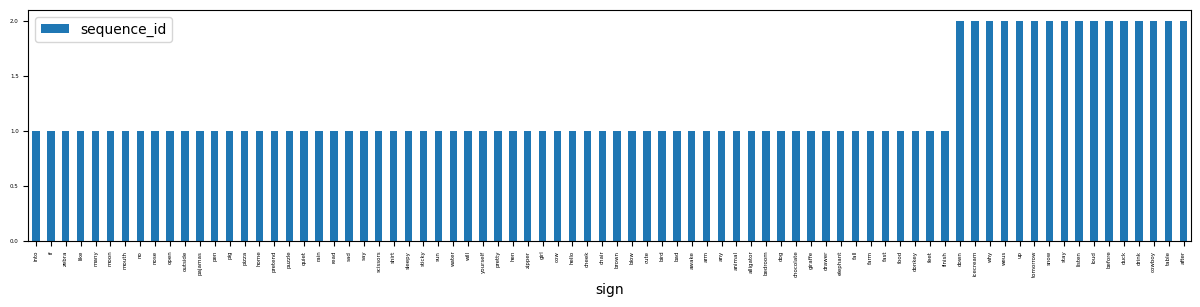

In [33]:
df_csv[["sign", "sequence_id"]].groupby("sign").count().sort_values(
    by="sequence_id"
).plot(kind="bar", figsize=(15, 3), fontsize=4)

In [34]:
df_csv[["sign", "sequence_id"]].groupby("sign").count().sort_values(
    by="sequence_id"
).describe()

,sequence_id
count,78.000000
mean,1.205128
std,0.406409
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


We have between 300 to 400 recorded total sequences for each sign. 

### Average 4499 sequences per participant

In [35]:
df_csv[["participant_id", "sequence_id"]].groupby("participant_id").count().sort_values(
    by="sequence_id"
).head()

,sequence_id
participant_id,
62590,1
16069,2
18796,2
27610,2
55372,3


<AxesSubplot:xlabel='participant_id'>

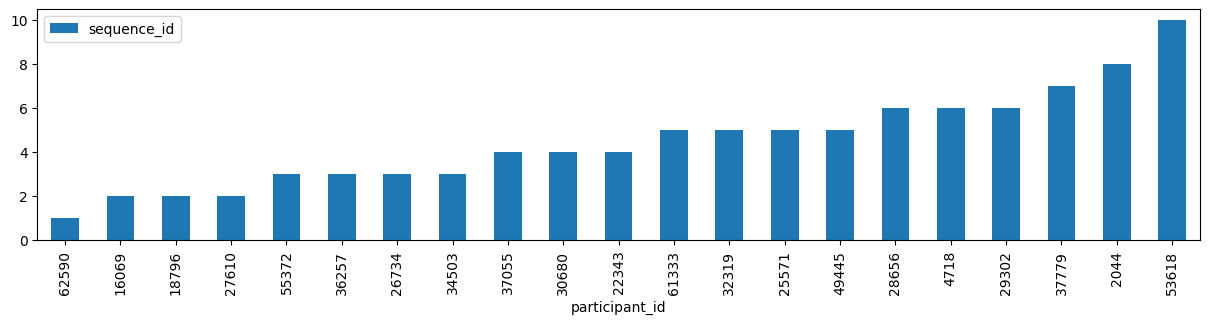

In [36]:
df_csv[["sequence_id", "participant_id"]].groupby("participant_id").count().sort_values(
    by="sequence_id"
).plot(kind="bar", figsize=(15, 3))

In [37]:
df_csv[["sequence_id", "participant_id"]].groupby("participant_id").count().sort_values(
    by="sequence_id"
).describe()

,sequence_id
count,21.000000
mean,4.476190
std,2.204973
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,10.000000


All participants signed well over 3000 sequences and most participants recorded even over 4000 sequences. 

### Some missing signs for participants 30680 and 25571

In [38]:
df_csv[["participant_id", "sign"]].groupby("participant_id").nunique().sort_values(
    by="sign"
).head()

,sign
participant_id,
62590,1
16069,2
18796,2
27610,2
55372,3


<AxesSubplot:xlabel='participant_id'>

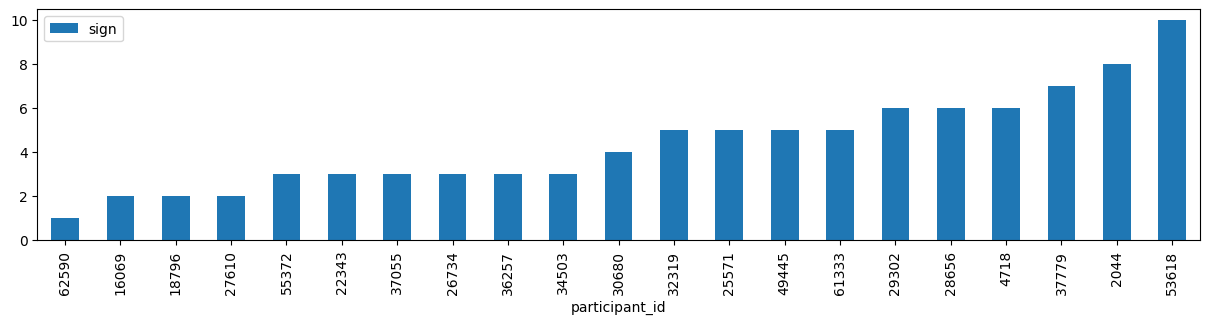

In [39]:
df_csv[["participant_id", "sign"]].groupby("participant_id").nunique().sort_values(
    by="sign"
).plot(kind="bar", figsize=(15, 3))

In [40]:
df_csv[["participant_id", "sign"]].groupby("participant_id").nunique().sort_values(
    by="sign"
).describe()

,sign
count,21.000000
mean,4.380952
std,2.246691
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,10.000000


In our dataset some signs are not available from participants 30680 and 25571. 

For participant 30680 following signs are missing: 

In [41]:
set(df_csv.sign.unique()).difference(
    set(df_csv[df_csv.participant_id == 30680].sign.unique())
)

{'after',
 'alligator',
 'animal',
 'any',
 'arm',
 'awake',
 'bad',
 'bedroom',
 'blow',
 'brown',
 'chair',
 'cheek',
 'chocolate',
 'cow',
 'cowboy',
 'cute',
 'dog',
 'donkey',
 'down',
 'drawer',
 'drink',
 'duck',
 'elephant',
 'fall',
 'fast',
 'feet',
 'finish',
 'food',
 'giraffe',
 'girl',
 'hello',
 'hen',
 'home',
 'icecream',
 'into',
 'like',
 'listen',
 'loud',
 'many',
 'moon',
 'mouth',
 'no',
 'nose',
 'open',
 'outside',
 'pajamas',
 'pen',
 'pig',
 'pizza',
 'pretend',
 'pretty',
 'puzzle',
 'quiet',
 'rain',
 'read',
 'sad',
 'say',
 'scissors',
 'shirt',
 'sleepy',
 'snow',
 'stay',
 'sticky',
 'sun',
 'table',
 'tomorrow',
 'up',
 'water',
 'weus',
 'why',
 'will',
 'yourself',
 'zebra',
 'zipper'}

For participant 25571 following signs are missing: 

In [42]:
set(df_csv.sign.unique()).difference(
    set(df_csv[df_csv.participant_id == 25571].sign.unique())
)

{'after',
 'animal',
 'any',
 'arm',
 'awake',
 'bad',
 'bedroom',
 'before',
 'bird',
 'blow',
 'chair',
 'cheek',
 'chocolate',
 'cowboy',
 'cute',
 'dog',
 'donkey',
 'down',
 'drawer',
 'drink',
 'duck',
 'elephant',
 'fall',
 'farm',
 'fast',
 'feet',
 'finish',
 'food',
 'giraffe',
 'girl',
 'hello',
 'hen',
 'home',
 'icecream',
 'if',
 'into',
 'like',
 'listen',
 'loud',
 'many',
 'moon',
 'mouth',
 'no',
 'nose',
 'open',
 'outside',
 'pajamas',
 'pen',
 'pig',
 'pizza',
 'pretty',
 'puzzle',
 'quiet',
 'rain',
 'read',
 'sad',
 'say',
 'scissors',
 'shirt',
 'sleepy',
 'snow',
 'sticky',
 'sun',
 'table',
 'tomorrow',
 'up',
 'water',
 'weus',
 'why',
 'will',
 'yourself',
 'zebra',
 'zipper'}

## The `.parquet` files

### General info

The `.parquet` files are the actual landmark data. They can be accessed per participant according to following path scheme inside the `asl-signs/` data folder: 

`train_landmark_files/[participant_id]/[sequence_id].parquet`

The landmarks were extracted from raw videos with the MediaPipe holistic model. Not all of the frames necessarily had visible hands or hands that could be detected by the model.

Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

- `frame` - The frame number in the raw video.
- `row_id` - A unique identifier for the row.
- `type` - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
- `landmark_index` - The landmark index number. Details of the [hand landmark locations can be found here](https://google.github.io/mediapipe/solutions/hands.html#hand-landmark-model).
- [`x`/`y`/`z`] - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.

### Single example `.parquet` file

Let's look at one example `.parquet` file. 

#### `.head()`

In [43]:
path_parquet = df_csv.path[0]
df_parquet_example = load_parquet_file_to_df(path_parquet)
df_parquet_example.head()

,frame,row_id,type,landmark_index,x,y,z
0,22,22-face-0,face,0,0.555303,0.441405,-0.058642
1,22,22-face-1,face,1,0.551702,0.403915,-0.079649
2,22,22-face-2,face,2,0.553267,0.418683,-0.048917
3,22,22-face-3,face,3,0.539900,0.376674,-0.048386
4,22,22-face-4,face,4,0.551267,0.393446,-0.081520


#### `.shape`

In [44]:
df_parquet_example.shape

(11403, 7)

#### `.info()`

In [45]:
df_parquet_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           11403 non-null  int16  
 1   row_id          11403 non-null  object 
 2   type            11403 non-null  object 
 3   landmark_index  11403 non-null  int16  
 4   x               10962 non-null  float64
 5   y               10962 non-null  float64
 6   z               10962 non-null  float64
dtypes: float64(3), int16(2), object(2)
memory usage: 490.1+ KB


#### `.describe()`

In [46]:
df_parquet_example.describe().round(2)

,frame,landmark_index,x,y,z
count,11403.00,11403.00,10962.00,10962.00,10962.00
mean,32.00,202.99,0.55,0.46,-0.03
std,6.06,146.80,0.13,0.25,0.26
min,22.00,0.00,-0.05,0.27,-2.46
25%,27.00,60.00,0.50,0.37,-0.04
50%,32.00,196.00,0.56,0.41,-0.01
75%,37.00,332.00,0.62,0.47,0.03
max,42.00,467.00,1.21,2.48,2.12


#### The `frame` column

- `min`: 22 (the `min` number in `frame` is not 0. Thus, a single sequence (video of a single sign) might be a cut from a longer raw video file with multiple signs performed in it)
- `max`: 42 (so the number of frames should be 21)
- `count`: 11,403 (we see same values in `frame` for multiple rows, suggesting a single `frame` has multiple data points based on `landmark_index`, `x`, `y` and `z`)

- For this example `.parquet` file it seems, that 
    1. the rows are already sorted by __ascending__ frame numbers and that 
    2. there are __no missing__ frame numbers. 

(see below)

In [47]:
# get the difference between consecutive frame values
frame_number = df_parquet_example.frame.unique()  # get only the unique frame numbers
[
    b - a for a, b in zip(frame_number, frame_number[1:])
]  # list comprehension to get difference between consecutive frame numbers

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#### The `row_id` column

- We see different values in `row_id` for each single row.  
- `row-id` seems to be in the form of [`frame`]-[`type`]-[`landmark_index`] of the current row. 
- Each row has a unique `row_id` column (see below)

In [48]:
df_parquet_example.row_id.nunique() == df_parquet_example.shape[0]

True

#### The `type` column

- We see same values in `type` for multiple rows. 
- There are `4` unique values: `face`, `left_hand`, `pose`, `right_hand` (see below)
- Most of the data points belong to `face` (86 %), followed by `pose` (6 %), `left_hand` (4 %) and `right_hand` (4 %) (see below)

In [49]:
df_parquet_example.type.nunique()

4

In [50]:
df_parquet_example.type.unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

In [51]:
type_fractions = (
    df_parquet_example.type.value_counts()
    / df_parquet_example.type.value_counts().sum()
)
type_fractions.round(2)

face          0.86
pose          0.06
left_hand     0.04
right_hand    0.04
Name: type, dtype: float64

#### The `landmark_index` column

- `min`: 0 
- `max`: 467
- We see different values in `landmark_index` for each single row.  
- There are `468` unique values in `landmark_index` (see below)

In [52]:
df_parquet_example.landmark_index.nunique()

468

#### The `x`, `y` and `z` columns

- We see different values in `x`, `y` and `z` for each single row. 
- These seem to be the actual __three-dimensional coordinates__ of each data point
- The values can be positive `> 0` and negative `< 0` numbers

# CONTINUE HERE 2023-04-15

### All `.parquet` files (whole data)

<span style="color:magenta">NOTE</span>: If run in `interactive` mode (based on a subsample data set) the results may differ from the statements made in the following as they were based on results achieved from a `full` mode run (based on the whole data set). 

In [53]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

ERROR:root:Cannot parse: 1:3: ---
Traceback (most recent call last):
  File "/Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/black/__init__.py", line 1035, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/black/parsing.py", line 96, in lib2to3_parse
    raise exc from None
black.parsing.InvalidInput: Cannot parse: 1:3: ---


#### `.shape()` 

In [ ]:
frame_min_max_all = []  # empty array container for all frame number counts
# loop over all .parquet file path entries in train.csv dataframe to load into new datafrane abd get .shape() (dimensions of dataframe)
for path_parquet in df_csv.path:
    df_parquet = load_parquet_file_to_df(path_parquet)
    df_parquet.shape
frame_min_max_all

#### Check for `null` values

2023-04-15: 

Run-time: `8m 36.0s`

Output: 
```
frame                     0
row_id                    0
type                      0
landmark_index            0
x                 115819938
y                 115819938
z                 115819938
dtype: int64
```

In [ ]:
# loop over all .parquet files to count null values
null_count = 0  # initialize counter for null values
for path_parquet in df_csv.path:
    df_parquet = load_parquet_file_to_df(path_parquet)
    null_count += df_parquet.isnull().sum()
    # print(path_parquet)
    # print(count_null)

null_count

There seems to be a lot of null values in the columns `x`, `y` and `z`. Interestingly, they seem to co-occur for `x`, `y` and `z`. Thus, the data seems to be missing for a whole row (frame). 

We might need to take a closer look to at how the null frames are distributed along the sequence.  

#### Check for `na` values

2023-04-15: 

Run-time: `8m 25.0s`

Output: 
```
frame                     0
row_id                    0
type                      0
landmark_index            0
x                 115819938
y                 115819938
z                 115819938
dtype: int64
```

In [ ]:
# loop over all .parquet files to count null values
na_count = 0  # initialize counter for null values
for path_parquet in df_csv.path:
    df_parquet = load_parquet_file_to_df(path_parquet)
    na_count += df_parquet.isna().sum()

na_count

Basically, te same as we observed for `null` values. 

#### Check for duplicated rows

2023-04-15: 

Run-time: `13m 21.9s`

Output: `0`

In [ ]:
# loop over all .parquet files to count null values
duplicated_count = 0  # initialize counter for null values
for path_parquet in df_csv.path:
    df_parquet = load_parquet_file_to_df(path_parquet)
    duplicated_count += df_parquet.duplicated().sum()

duplicated_count

We don't have any duplicated rows in our data :) 

# Most of the stuff past this point, needs to be validated with the whole dataset

### The `frame` column

In [ ]:
load_parquet_file_to_df(path_parquet).groupby("frame").count()

#### `min` (start), `max` (end), and `len` (number or counts) of `frame` for each `.parquet` file

In [ ]:
frame_min_max_all = []  # empty array container for all frame number counts
# loop over all .parquet file path entries in train.csv dataframe to count the number of frames for each .parquet file and append to a list
for path_parquet in df_csv.path:
    df_parquet = load_parquet_file_to_df(path_parquet)
    i_frame_parquet_min = df_parquet.frame.unique().min()
    i_frame_parquet_max = df_parquet.frame.unique().max()
    n_frame_parquet = len(df_parquet.frame.unique())
    frame_min_max_all.append(
        [i_frame_parquet_min, i_frame_parquet_max, n_frame_parquet]
    )
frame_min_max_all

In [ ]:
sns.barplot(x=df_csv.sequence_id, y=)

The `min` column further shows us, that most sequences don't start at frame 0 (maybe due to some pre-processing by the client). We are going to reassign all frame indices so that each sequence starts with frame 0. 

#### Number of frames

Here, we want to describe and analyze the number of frames for each `.parquet` file. Therefore, we extract the number of frames for each `.parquet` file and append it into an `array` containing all `.parquet` files together. 

In [ ]:
n_frames_all = []  # empty array container for all frame number counts
# loop over all .parquet file path entries in train.csv dataframe to count the number of frames for each .parquet file and append to a list
for path_parquet in df_csv.path:
    df_parquet = load_parquet_file_to_df(path_parquet)
    n_frames_parquet = df_parquet.frame.nunique()
    n_frames_all.append(n_frames_parquet)

#### Number of frames per sequence

Let's look at some descriptive statistics on the `frame` column. 

In [ ]:
---
n_frames_all = pd.Series(n_frames_all, name="n_frames") # convert array of frame counts to pd.Series for pd.concat with dataframe
df_frames_sequence = pd.concat([n_frames_all, df_csv.sequence_id], axis=1) # concatenate columns of frame counts and sequence IDs
df_frames_sequence.n_frames.describe().round(2) # descriptive statistics for number of frames

The `count` (count of frames for each sequence) column shows that 
* some sequences are too short (`min` = ). We will remove sequences shorter than 5 frames. 
* some sequences are too long (`max` = ). We will remove sequences longer than 130 frames. 
* sequences differ a lot in their lengths. We will bring all sequences to the same length by cropping or padding. 

#### Number of frames per sign

First, let's get the frame counts for each sequence by reading in each parquet file one by one. 

In [ ]:
i_max = df_csv.shape[0]
n_frames_all = [] # container for all frame counts

# loop over all rows in train.csv dataframe to get the number of frames
for i in range(i_max): 
    # print every 100 i
    if i == 0:
        print(i)
    if i%100 == 0: 
        print(i)
    if i == i_max: 
        print(i)
    df_parquet = pd.read_parquet('../data/asl-signs/' + df_csv.path[i])
    n_frames = df_parquet.frame.nunique()
    n_frames_all.append(n_frames)

n_frames_all = pd.Series(n_frames_all, name='n_frames') # convert to pd.Series
df_frames = pd.concat([n_frames_all, df_csv.sign, df_csv.participant_id], axis=1)

Let's loot at the boxplot.

In [ ]:
# order by decreasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# boxplot
sns.boxplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()

and the barplot...

In [ ]:
# order by decreasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# barplot
sns.barplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()


#### Number of frames per participant

In [ ]:
# order by decreasing mean
my_order = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index
# boxplot
sns.boxplot(data=df_frames, x="participant_id", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# order by decreasing mean
my_order = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index
# barplot
sns.barplot(data=df_frames, x="participant_id", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()


Some participants (49445) needed up to almost 70 frames per sequence, and others (37779) down to only 10 frames per sequence. 

#### Sanity Check: Look at the distribution of signs per participant

To exclude, that the participants with lowest/highest number of frames are enriched in certain words (e.g. short/long signs). 

In [ ]:
df_frames = pd.read_csv('../data/n_frames.csv')
df_frames.head()

##### Participant with highest number of frames

In [ ]:
data = df_frames[df_frames.participant_id == 49445].sign.value_counts().reset_index() # participant with highest number of frames
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

sns.barplot(data=data, x="index", y="sign", order=my_order)
plt.xticks(rotation=90)
plt.show()

##### Participant with lowest number of frames

In [ ]:
data = df_frames[df_frames.participant_id == 37779].sign.value_counts().reset_index() # participant with lowest number of frames
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

sns.barplot(data=data, x="index", y="sign", order=my_order)
plt.xticks(rotation=90)
plt.show()

##### Number of frames per word and per participant

This plot shows the number of frames for each single word for each single participant. 

In [ ]:
# plotting parameters
participants = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index # list of participants sorted by ascending number of frames
ncols = 1 # define plot matrix columns always as 3 
nrows = math.ceil(len(participants+1)/ncols) # define rows depending on the number of participants / categories + one extra row for the total counts
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

# formatting plotting areas
f, axes = plt.subplots(nrows, ncols, figsize=(30, 30)) # define plot area layout based on pre-defined number of columns and rows
axes = axes.ravel() # flatten axes object to later access it as axes[i] with i indicating the heatmap number

# loop over all available participants to plot each sign distribution
for i in range(len(participants)): 
    #print(i)
    participant = participants[i]

    # sign count data for current participant 
    sign_counts = df_frames[df_frames.participant_id == participant].sign.value_counts().reset_index() 

    # plot
    g = sns.barplot(ax=axes[i], data=sign_counts, x="index", y="sign", order=my_order)

    # set y axis labels
    g.set_ylabel(ylabel=f'Participant {participant}', rotation=0, horizontalalignment='right')

    # show xticks labels only for the last row
    if i != len(participants)-1: 
        g.set(xticklabels=[]) 
        g.set(xlabel=None)
        g.tick_params(bottom=False)  # remove the ticks
    else: 
        g.set_xticklabels(g.get_xticklabels(), rotation=90)

# total sign count data
sign_counts = df_frames.sign.value_counts().reset_index() 

# plot total counts
g = sns.barplot(ax=axes[i], data=sign_counts, x="index", y="sign", order=my_order)

# set y axis label for total
g.set_ylabel(ylabel=f'Total', rotation=0, horizontalalignment='right')

# final plotting
plt.show()

### Video visualisation of parquet files

In this section you find two approaches to visualize the parquet files of sign recordings. Here, we want to further find out more about too long/too short sequences. 

Code for visualization was adapted from https://www.kaggle.com/code/danielpeshkov/animated-data-visualization

#### Load train.csv file

In [ ]:
#import csv file with train targets
dir = '/data/asl-signs'
train_df = pd.read_csv('../data/asl-signs/train.csv')

#### Example sequences with frame length more than 100 frames:

These sequences were extracted from the EDA_DataCleaning Notebook

sequence_id - Frame length
* 203327050     106
* 269920128     129
* 621161958     139
* 690456887     132
* 994309330     134
* 1862716737    135
* 2085945934    133
* 2292927765    114
* 2779257484    123
* 2889201858    129
* 3116562701    118
* 3380869090    116
* 3797899944    123
* 4183154128    125

#### Defining sequence id and extracting sequence information

In [ ]:
# If you want to check specific signs or specific participants you can get example sequences 
# enter participant or sign you want to check, enter 0 if all should be queried
participant = 55372 
label_sign = 'listen'

# getting samples for desired sign and/or participant
if participant == 0:
    # get sequences for specific sign
    display(train_df.query(f'sign == "{label_sign}"').sample(5))
else:
    if label_sign == 0:
        # get sequences for specific participant
        display(train_df.query(f'participant_id == {participant}').sample(5))
    else:
        display(train_df.query(f'sign == "{label_sign}" and participant_id == {participant}').sample(5))

In [ ]:
# copy a sequence id from the query above or
# enter a specific sequence you want to check
sequence = 3116562701  

In [ ]:
## Loading the corresponding parquet file
path_to_sign = train_df.query(f'sequence_id == {sequence}').iloc[0, 0]
sign = pd.read_parquet(f'..{dir}/{path_to_sign}')
sign.y = sign.y * -1

#print information about the selected sequence
print(f'The sign shown in the sequence is: {train_df.query(f"sequence_id == {sequence}").iloc[0,3]}.')
print(f'The sign was recorded by participant: {train_df.query(f"sequence_id == {sequence}").iloc[0,1]}.')
print(f'Shape of the selected recording is: {sign.shape}')
print(f'The frame length is: {sign.frame.max() - sign.frame.min()} frames.')

--------

#### First approach of visualization

##### Helper functions

These two functions return the coordinate values with connecting lines for hands and pose.

In [ ]:
def get_hand_points(hand):
    x = [[hand.iloc[0].x, hand.iloc[1].x, hand.iloc[2].x, hand.iloc[3].x, hand.iloc[4].x], # Thumb
         [hand.iloc[5].x, hand.iloc[6].x, hand.iloc[7].x, hand.iloc[8].x], # Index
         [hand.iloc[9].x, hand.iloc[10].x, hand.iloc[11].x, hand.iloc[12].x], 
         [hand.iloc[13].x, hand.iloc[14].x, hand.iloc[15].x, hand.iloc[16].x], 
         [hand.iloc[17].x, hand.iloc[18].x, hand.iloc[19].x, hand.iloc[20].x], 
         [hand.iloc[0].x, hand.iloc[5].x, hand.iloc[9].x, hand.iloc[13].x, hand.iloc[17].x, hand.iloc[0].x]]

    y = [[hand.iloc[0].y, hand.iloc[1].y, hand.iloc[2].y, hand.iloc[3].y, hand.iloc[4].y],  #Thumb
         [hand.iloc[5].y, hand.iloc[6].y, hand.iloc[7].y, hand.iloc[8].y], # Index
         [hand.iloc[9].y, hand.iloc[10].y, hand.iloc[11].y, hand.iloc[12].y], 
         [hand.iloc[13].y, hand.iloc[14].y, hand.iloc[15].y, hand.iloc[16].y], 
         [hand.iloc[17].y, hand.iloc[18].y, hand.iloc[19].y, hand.iloc[20].y], 
         [hand.iloc[0].y, hand.iloc[5].y, hand.iloc[9].y, hand.iloc[13].y, hand.iloc[17].y, hand.iloc[0].y]] 
    return x, y

def get_pose_points(pose):
    x = [[pose.iloc[8].x, pose.iloc[6].x, pose.iloc[5].x, pose.iloc[4].x, pose.iloc[0].x, pose.iloc[1].x, pose.iloc[2].x, pose.iloc[3].x, pose.iloc[7].x], 
         [pose.iloc[10].x, pose.iloc[9].x], 
         [pose.iloc[22].x, pose.iloc[16].x, pose.iloc[20].x, pose.iloc[18].x, pose.iloc[16].x, pose.iloc[14].x, pose.iloc[12].x, 
          pose.iloc[11].x, pose.iloc[13].x, pose.iloc[15].x, pose.iloc[17].x, pose.iloc[19].x, pose.iloc[15].x, pose.iloc[21].x], 
         [pose.iloc[12].x, pose.iloc[24].x, pose.iloc[26].x, pose.iloc[28].x, pose.iloc[30].x, pose.iloc[32].x, pose.iloc[28].x], 
         [pose.iloc[11].x, pose.iloc[23].x, pose.iloc[25].x, pose.iloc[27].x, pose.iloc[29].x, pose.iloc[31].x, pose.iloc[27].x], 
         [pose.iloc[24].x, pose.iloc[23].x]
        ]

    y = [[pose.iloc[8].y, pose.iloc[6].y, pose.iloc[5].y, pose.iloc[4].y, pose.iloc[0].y, pose.iloc[1].y, pose.iloc[2].y, pose.iloc[3].y, pose.iloc[7].y], 
         [pose.iloc[10].y, pose.iloc[9].y], 
         [pose.iloc[22].y, pose.iloc[16].y, pose.iloc[20].y, pose.iloc[18].y, pose.iloc[16].y, pose.iloc[14].y, pose.iloc[12].y, 
          pose.iloc[11].y, pose.iloc[13].y, pose.iloc[15].y, pose.iloc[17].y, pose.iloc[19].y, pose.iloc[15].y, pose.iloc[21].y], 
         [pose.iloc[12].y, pose.iloc[24].y, pose.iloc[26].y, pose.iloc[28].y, pose.iloc[30].y, pose.iloc[32].y, pose.iloc[28].y], 
         [pose.iloc[11].y, pose.iloc[23].y, pose.iloc[25].y, pose.iloc[27].y, pose.iloc[29].y, pose.iloc[31].y, pose.iloc[27].y], 
         [pose.iloc[24].y, pose.iloc[23].y]
        ]
    return x, y

This function plots the animation frames. 

In [ ]:
#run function to plot selected sequence
def animation_frame(f):
    frame = sign[sign.frame==f]
    left = frame[frame.type=='left_hand']
    right = frame[frame.type=='right_hand']
    pose = frame[frame.type=='pose']
    face = frame[frame.type=='face'][['x', 'y']].values
    lx, ly = get_hand_points(left)
    rx, ry = get_hand_points(right)
    px, py = get_pose_points(pose)
    ax.clear()
    ax.plot(face[:,0], face[:,1], '.')
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    for i in range(len(rx)):
        ax.plot(rx[i], ry[i])
    for i in range(len(px)):
        ax.plot(px[i], py[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

##### Create animation

In [ ]:
# These values set the limits on the graph to stabilize the video
xmin = sign.x.min() - 0.2
xmax = sign.x.max() + 0.2
ymin = sign.y.min() - 0.2
ymax = sign.y.max() + 0.2

fig, ax = plt.subplots()
l, = ax.plot([], [])
animation = FuncAnimation(fig, func=animation_frame, frames=sign.frame.unique())

HTML(animation.to_html5_video())

--------
#### Second approach for visualisation - Animation

Code for animation was adapted from: https://www.kaggle.com/code/ted0071/gislr-visualization/notebook 

##### Setup

In [ ]:
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

##### Functions for visualisation

In [ ]:
class Cfg:
    RANDOM_STATE = 2023
    INPUT_ROOT = Path('../data/asl-signs/')
    OUTPUT_ROOT = Path('../images/working')
    INDEX_MAP_FILE = INPUT_ROOT / 'sign_to_prediction_index_map.json'
    TRAN_FILE = INPUT_ROOT / 'train.csv'
    INDEX = 'sequence_id'
    ROW_ID = 'row_id'

In [ ]:
def read_landmark_data_by_path(file_path, input_root=Cfg.INPUT_ROOT):
    """Reads landmak data by the given file path."""
    data = pd.read_parquet(input_root / file_path)
    return data.set_index(Cfg.ROW_ID)

def read_landmark_data_by_id(sequence_id, train_data):
    """Reads the landmark data by the given sequence id."""
    file_path = train_df.query(f'sequence_id == {sequence}').iloc[0, 0] # changed, check
    return read_landmark_data_by_path(file_path)

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh
mp_pose = mp.solutions.pose

In [ ]:
height = 1600
width = 1200

data = sign
frame_id = data['frame'][0]

In [ ]:
def create_blank_image(height, width):
    return np.zeros((height, width, 3), np.uint8)

def draw_landmarks(
    data, 
    image, 
    frame_id, 
    landmark_type, 
    connection_type, 
    landmark_color=(255, 0, 0), 
    connection_color=(0, 20, 255), 
    thickness=1, 
    circle_radius=1
):
    """Draws landmarks"""
    df = data.groupby(['frame', 'type']).get_group((frame_id, landmark_type))
    landmarks = [landmark_pb2.NormalizedLandmark(x=lm.x, y=lm.y, z=lm.z) for idx, lm in df.iterrows()]
    landmark_list = landmark_pb2.NormalizedLandmarkList(landmark = landmarks)

    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=landmark_list, 
        connections=connection_type,
        landmark_drawing_spec=mp_drawing.DrawingSpec(
            color=landmark_color, 
            thickness=thickness, 
            circle_radius=circle_radius),
        connection_drawing_spec=mp_drawing.DrawingSpec(
            color=connection_color, 
            thickness=thickness, 
            circle_radius=circle_radius))
    return image

def draw_left_hand(data, image, frame_id):
    return draw_landmarks(
        data, 
        image, 
        frame_id, 
        landmark_type='left_hand', 
        connection_type=mp_hands.HAND_CONNECTIONS,
        landmark_color=(255, 0, 0),
        connection_color=(0, 20, 255), 
        thickness=3, 
        circle_radius=3)

def draw_right_hand(data, image, frame_id):
    return draw_landmarks(
        data, 
        image, 
        frame_id, 
        landmark_type='right_hand', 
        connection_type=mp_hands.HAND_CONNECTIONS,
        landmark_color=(255, 0, 0),
        connection_color=(0, 20, 255),
        thickness=3, 
        circle_radius=3)

def draw_face(data, image, frame_id):
    return draw_landmarks(
        data, 
        image, 
        frame_id, 
        landmark_type='face', 
        connection_type=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_color=(255, 255, 255),
        connection_color=(0, 255, 0))      
    
def draw_pose(data, image, frame_id):
    return draw_landmarks(
        data, 
        image, 
        frame_id, 
        landmark_type='pose', 
        connection_type=mp_pose.POSE_CONNECTIONS,
        landmark_color=(255, 255, 255),
        connection_color=(255, 0, 0),
        thickness=2, 
        circle_radius=2)

def create_frame(data, frame_id, height=1000, width=1000):
    image = create_blank_image(height, width)    

    draw_pose(data, image, frame_id) 
    draw_left_hand(data, image, frame_id)    
    draw_right_hand(data, image, frame_id)  
    draw_face(data, image, frame_id)
     
    return image

In [ ]:
def create_frames(sequence_id, train_data, height=800, width=800):
    data = read_landmark_data_by_id(sequence_id, train_data)
    frame_ids = data['frame'].unique()
    images = [create_frame(data, frame_id=fid, height=height, width=width) for fid in frame_ids]
    return np.array(images)

In [ ]:
def create_animation(images, fig, ax):
    ax.axis('off')
    
    ims = []
    for img in images:
        im = ax.imshow(img, animated=True)
        ims.append([im])
    
    func_animation = animation.ArtistAnimation(
        fig, 
        ims, 
        interval=100, 
        blit=True,
        repeat_delay=1000)

    return func_animation

def play_animation(sequence_id, train_data, height, width, figsize=(4, 4)):
    frames = create_frames(sequence_id, train_data, height=height, width=width)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    anim = create_animation(frames, fig, ax)    
    video = anim.to_html5_video()
    
    html = ds.HTML(video)
    ds.display(html)
    plt.close()

##### Create animation

In [ ]:
play_animation(sequence, train_df, height=height, width=width)

## __5. Feature Engineering__

X.shape: (number of sequences, number of frames per sequence, total number of key points)

### Drop columns, that we don't need. 

#### Drop `row_id` column

In [ ]:
#drop row_id
df = df.drop('row_id', axis = 1)

#### Drop `z` column 

The client mentioned "The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values."

In [ ]:
#drop z
df = df.drop('z', axis = 1)

In [ ]:
df.head()

---

Continue in Ronja's notebook at 

**Make one column per frame**

---

### Make one column per frame

In [ ]:
#make one column per frame with all the landmarks 

df_wide = df
df_wide['idx'] = df_wide.groupby('sequence_id').cumcount()+1
df_wide = df_wide.pivot_table(index=['sequence_id', 'frame', 'sign'], columns=['landmark_index', 'type'], 
                    values=['x', 'y'], aggfunc='first')

df_wide = df_wide.sort_index(axis=1, level=1)
df_wide.columns = [f'{x}_{y}_{z}' for x,y,z in df_wide.columns]
df_wide = df_wide.reset_index()

df_wide.head()

### Check for `null` values

In [ ]:
df_wide.isnull().sum()

In [ ]:
df_wide[df_wide.y_467_face.isnull()]

We have a considerable amount of `null` values. So, let's look at them all at once in a heatmap. 

In [ ]:
plt.figure()
sns.heatmap(df_wide.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

It looks like we have a larger distribution of missing values in the data columns representing the hand landmarks. This can be explained by the fact, that participants had to hold their smartphones in one hand for recording and had only the other hand available for signing. 

Despite those, there seems to be some entire rows with missing values, thus might be some error / glitch in the sequence.

### Check for `na` values

In [ ]:
df_wide.isna().sum()

In [ ]:
plt.figure()
sns.heatmap(df_wide.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

This is basically showing the same as already seen for `null` values. 

### Imputing / Infering missing values

Based on above findings, we decided to deal with the missing values as follows: 

1. `GROUP` data `BY` sequences (interpolation should only be done per sequence)
2. `IF` are less than 2 consecutive `NaN`s (limit = 2), interpolate `NaN`s linearly from their neighboring rows (frame before and after) 
3. Impute all remaining `NaN`s to 0.
    

#### Interpolation of single missing values from neighboring values

In [ ]:
# use interpolate method for single missing values
df_wide = df_wide.groupby('sequence_id').apply(lambda group: group.interpolate(limit = 2, limit_direction = 'both'))

Let's quickly check what happened. 

In [ ]:
# check updated dataframe
plt.figure()
sns.heatmap(df_wide.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

We can see that we already got rid of all the single rows with missing values by imputing their values from the neighboring rows. Now, we can impute the remaining missing values with 0. 

#### Imputing large patches of missing values to `0`

In [ ]:
#replace the rest of the NaN with 0
df_wide.fillna(0, inplace = True)

Let's quickly check what happened. 

In [ ]:
# check updated dataframe
plt.figure()
sns.heatmap(df_wide.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [ ]:
# sum of all na and null values
(df_wide.isnull().sum() + df_wide.isna().sum()).sum()

### The `frame` column

As mentioned in the EDA section, we are going to perform some adjustement to our data based on the `frame` column. 

#### Removing sequences that are too short (less than 5 frames)

First let's look at the barplot showing the sequences lengths (frame counts per sequence). Horizontal lines indicate the frame count values 5 (too short) and 130 (too long). 

In [ ]:
# function to plot number of frames per sequence
def plot_frames_per_sequence(df_wide): 

    fig, ax = plt.subplots(figsize=(20, 5))
    
    # drawing the plot
    sns.countplot(x = df_wide['sequence_id'],  ax=ax)
    plt.axhline(y = 5, color = 'b', label = 'axvline - full height')
    plt.axhline(y = 130, color = 'b', label = 'axvline - full height')
    plt.show()

plot_frames_per_sequence(df_wide)

In [ ]:
#drop sequences with less than 5 frames
print(f'{df_wide.sequence_id.nunique()} sequences before filtering.')
df_wide = df_wide.groupby('sequence_id').filter(lambda x : len(x)>4)
print(f'{df_wide.sequence_id.nunique()} sequences after filtering all with less than 4 frames.')

Let's also look at the plot after removing all short sequences. 

In [ ]:
plot_frames_per_sequence(df_wide)

#### Removing sequences that are too long ??? (more than ??? frames)

Now, we remove all sequences that we consider too long (more than 130 frames). 

In [ ]:
df_wide = df_wide.groupby('sequence_id').filter(lambda x : len(x)<131)
df_wide.sequence_id.nunique()

And again we have a look at the barplot after removing long sequences. 

In [ ]:
plot_frames_per_sequence(df_wide)

#### Reassign frame indices to start from `0` for each sequence

We create a new column `frame_index` with frame indices ranging from 0 to the last frame for each sequence. Then, we drop the old `frame` column. 

In [ ]:
# for all sequences, give frames a new index starting from 0
df_wide["frame_index"] = df_wide.groupby("sequence_id").cumcount()  # make new frame indices
df_wide = df_wide.drop('frame', axis = 1) # drop the old frame indices

Quickly check, if it worked. 

In [ ]:
df_wide.head()

In [ ]:
# quick check if the number of starting frames (= 0) is equal to the number of sequences
(df_wide.frame_index == 0).sum() == df_wide.sequence_id.nunique()

Seems, it worked :)

### Cropping / padding sequences to same length

From above we know, that the lengths of sequences vary a lot and decided to bring all sequences to the same length by either cropping or padding. 

First we define some helper functions. 

In [ ]:
# function for padding
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')


In [ ]:
# function to truncate the middle data points of each sequence

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [ ]:
# we have to make sequences first for this to work

# decide which columns are of interest
feature_columns = df_wide.columns.to_list()[2:1088]

#make sequences
sequences = list()

for sequence_id, group in df_wide.groupby('sequence_id'):
    sequence_features = group[feature_columns]
    #label = df_wide[df_wide.sequence_id == sequence_id].iloc[0].sign #this would at the label to the sequence if we want that
    values = sequence_features.values 
    #sequences.append((sequence_features, label))
    sequences.append(values)

In [ ]:

new_seq = []
for one_seq in sequences: #loop through all sequences
    new_one_seq = padding(one_seq,130, 1086)
    new_seq.append(new_one_seq)


final_seq = np.stack(new_seq)
final_seq[9]

In [ ]:
crop_seq = []
for one_seq in final_seq: #loop through all sequences
    
    crop_one_seq = crop_center(one_seq,1086, 30)
    crop_seq.append(crop_one_seq)


cropped_seq = np.stack(crop_seq)
cropped_seq[9]

### Generate `X` and `y` data

In [ ]:
X = cropped_seq

In [ ]:
""" TALK TO RONJA
# get corresponding y
y = df_wide.groupby('sequence_id')['sign'].agg(pd.Series.mode)
pd.DataFrame(y)
# get dummies because this is how the model wants the data
y = pd.get_dummies(y)
"""

### Save `X` and `y` data as `.npy` files

In [ ]:
#save as numpy files
np.save('../data/y-data.npy', y)
np.save('../data/X-data.npy', X)

# __6. Modeling__

## Baseline model

### Load data

In [ ]:
df = pd.read_csv("../data/asl-signs/train.csv")

### Define `X` and `y`

In [ ]:
# applying dictionary on sign to create target column
df["target"] = df.sign.map(sign_to_prediction_index_map)
df.head()

In [ ]:
y = df.target
X = df.drop("target", axis=1)
X.head()

In [ ]:
y = pd.get_dummies(y)
y.head()

### Zero Baseline Model: Dummy Classifier

In [ ]:
"""
# Install nb_black for autoformatting
!pip install nb_black --quiet
%load_ext lab_black
"""

#### Splitting into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Model training and prediction: Dummy Classifier

In [ ]:
dummy_model = DummyClassifier(strategy="stratified", random_state=42)
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
y_proba = dummy_model.predict_proba(X_test)

In [ ]:
y_test_original = y_test.copy()
y_pred_original = y_pred.copy()
y_test = np.argmax(np.array(y_test), axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

#### Model evaluation

In [ ]:
# multilabel confusion matrix
multilabel_confusion_matrix(y_test, y_pred)

In [ ]:
# accuracy score
accuracy_score(y_test, y_pred)

#### Conclusion
* I am not 100% sure how well this works for multiclass classification because for y_pred you get several predictions for several classes

